In [ ]:
# Connect the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/GlobalAiHackathon2024

/content/drive/My Drive/GlobalAiHackathon2024


In [ ]:
# !pip install zipcodes

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter
# import zipcodes

In [ ]:
raw_df = pd.read_csv('train.csv', index_col=0)
raw_df.head()

,TAXPAYER_ID,FIRM_ID,CLIENT_ID,FILED_DATETIME,TAX_YEAR,REFUND,ROUTING_NUMBER1,DEPOSIT_ACCOUNT1,ROUTING_NUMBER2,DEPOSIT_ACCOUNT2,ROUTING_NUMBER3,DEPOSIT_ACCOUNT3,PTIN,IP_ADDRESS,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS
0,58d38972-8bca-4f8a-b09d-dd3840c72f87,e1d5084f-b26f-49ee-ae44-20f49ba14323,YMCV,1/20/2021 0:59,2020,4206,cf6f5e9b-ef6a-4e5d-a018-76a1ed04e66b,cb151ba0-40d3-44fa-9084-325180fc3dee,NaN,NaN,NaN,NaN,96bc45c7-fcd1-476f-8f6c-6b3bb916b5cd,f1786c4e-a4e8-44c3-a61a-e719faeda92b,33863,47,True,False
1,b6ee41c8-7ec4-4a82-9c59-93623456003f,c7985081-f56d-48bc-8c41-f6213c6308ea,NEZP,1/20/2021 6:40,2020,2276,6e5e6fb4-5ecc-4e3b-b94b-a9de2315d754,9b622e78-3331-43dc-8319-1037939c9b4c,NaN,NaN,NaN,NaN,f7744112-cb96-474c-b4f2-b2f92484f00b,f54ff4d6-2e09-4810-8746-193930327a15,23929,30,True,False
2,c6e4e68b-7b43-40df-828e-8ae0e8a5e83b,5793ebb5-c84d-4dfe-b32e-4cf2fc818766,JMQZVSCIY,1/20/2021 7:15,2020,4373,736bc35b-25b5-429b-bcd2-14f9d807451b,5435d3fe-a0f8-474b-aedc-d8fa4cb1790a,NaN,NaN,NaN,NaN,f588237a-02e0-4e92-b4cc-5c86e7ea37b3,c0a4a946-351c-4504-b289-7b8741c8b106,56438,17,True,False
3,5d6a3d43-5218-4e9c-8d30-7a94351fc5e7,af8ef686-0b89-4c23-b768-97b1895753d4,CAZVH,1/20/2021 8:31,2020,1339,752b16b9-b962-4d06-8dc1-6ac20d55c959,feeb1b3c-c1b5-4354-b51a-3ef6215321d8,NaN,NaN,NaN,NaN,3508d9be-fb82-4a27-b613-446db4ea8744,c21d1fe5-8d29-4ea7-a011-1b5c669ad647,37826,6,False,False
4,92f738fe-2c04-416a-9d08-24c1d51a23c9,e7ce1baf-4ca7-4ee1-9daa-e1d2506be956,UTYZ,1/20/2021 9:46,2020,3388,9fb90110-577c-444c-889f-cafed1da6a0b,2f19f5c8-ae53-406e-a7cc-41b21641fb90,NaN,NaN,NaN,NaN,426e5759-33cb-4e38-9cd7-f2993232f1bd,16d0f8ca-74bf-4fdf-8b12-cede25538a6d,23380,50,True,False


In [ ]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
df = df.drop(['FILED_DATETIME','TAXPAYER_ID','FIRM_ID','CLIENT_ID','ROUTING_NUMBER1','DEPOSIT_ACCOUNT1','ROUTING_NUMBER2','DEPOSIT_ACCOUNT2','ROUTING_NUMBER3','DEPOSIT_ACCOUNT3','PTIN','IP_ADDRESS', 'TAX_YEAR'],axis=1)
df.head()

,REFUND,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS
0,4206,33863,47,True,False
1,2276,23929,30,True,False
2,4373,56438,17,True,False
3,1339,37826,6,False,False
4,3388,23380,50,True,False


In [ ]:
# prompt: get me list of zipcodes where is_suspicious is True

suspicious_zipcodes = df[df['IS_SUSPICIOUS'] == True]['ZIPCODE'].tolist()
df['IS_FRAUD'] = df['ZIPCODE'].apply(lambda x: True if x in suspicious_zipcodes else False)
df.head()


,REFUND,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS,IS_FRAUD
0,4206,33863,47,True,False,False
1,2276,23929,30,True,False,False
2,4373,56438,17,True,False,False
3,1339,37826,6,False,False,False
4,3388,23380,50,True,False,False


In [ ]:
df['IS_FLAG'] = df['REFUND'].apply(lambda x: True if x > 7500 else False)
df.head()


,REFUND,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS,IS_FRAUD,IS_FLAG
0,4206,33863,47,True,False,False,False
1,2276,23929,30,True,False,False,False
2,4373,56438,17,True,False,False,False
3,1339,37826,6,False,False,False,False
4,3388,23380,50,True,False,False,False


In [ ]:
# prompt: how to one hot encode state_placeholder and state_attached

df = pd.get_dummies(df, columns=['STATE_PLACEHOLDER'])
df.head()


,REFUND,ZIPCODE,STATE_ATTACHED,IS_SUSPICIOUS,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_3,...,STATE_PLACEHOLDER_41,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_43,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_47,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50
0,4206,33863,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2276,23929,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4373,56438,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1339,37826,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3388,23380,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# prompt: scale refund column for me

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

refund_scaled = scaler.fit_transform(df['REFUND'].values.reshape(-1, 1))

df['REFUND_SCALED'] = refund_scaled

df.head()


,REFUND,ZIPCODE,STATE_ATTACHED,IS_SUSPICIOUS,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_3,...,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_43,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_47,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50,REFUND_SCALED
0,4206,33863,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.774320
1,2276,23929,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.472823
2,4373,56438,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.882234
3,1339,37826,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-1.078301
4,3388,23380,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.245738


In [ ]:
# prompt: drop refund column

df.drop(['REFUND'],axis=1,inplace=True)
df.head()


,ZIPCODE,STATE_ATTACHED,IS_SUSPICIOUS,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_3,STATE_PLACEHOLDER_4,...,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_43,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_47,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50,REFUND_SCALED
0,33863,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.774320
1,23929,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.472823
2,56438,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.882234
3,37826,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-1.078301
4,23380,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.245738


In [ ]:
# prompt: how to determine important columns from the dataframe where IS_SUSPICIOUS is the independant column

from sklearn.feature_selection import SelectKBest, f_classif

# Define the independent and dependent variables
X = df.drop('IS_SUSPICIOUS', axis=1)
y = df['IS_SUSPICIOUS']

# Select the top k most important features based on the F-statistic
selector = SelectKBest(f_classif, k=52)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Print the selected features
print("Selected features:", selected_features)


Selected features: Index(['ZIPCODE', 'STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
       'STATE_PLACEHOLDER_0', 'STATE_PLACEHOLDER_1', 'STATE_PLACEHOLDER_2',
       'STATE_PLACEHOLDER_4', 'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_6',
       'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8', 'STATE_PLACEHOLDER_9',
       'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12',
       'STATE_PLACEHOLDER_13', 'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15',
       'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_18', 'STATE_PLACEHOLDER_19',
       'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_22',
       'STATE_PLACEHOLDER_23', 'STATE_PLACEHOLDER_24', 'STATE_PLACEHOLDER_25',
       'STATE_PLACEHOLDER_26', 'STATE_PLACEHOLDER_27', 'STATE_PLACEHOLDER_28',
       'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_31',
       'STATE_PLACEHOLDER_32', 'STATE_PLACEHOLDER_33', 'STATE_PLACEHOLDER_34',
       'STATE_PLACEHOLDER_35', 'STATE_PLACEHOLDER_36', 'STATE_

In [ ]:
# prompt: write me a code such that only this columns are selected in a dataframe

# 15
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_11',
#        'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_34',
#        'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_42',
#        'STATE_PLACEHOLDER_50', 'REFUND_SCALED']

# 20
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8',
#        'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12',
#        'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21',
#        'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_34', 'STATE_PLACEHOLDER_37',
#        'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_42', 'STATE_PLACEHOLDER_50',
#        'REFUND_SCALED']

# 24
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8',
#        'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11',
#        'STATE_PLACEHOLDER_12', 'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15',
#        'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21',
#        'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_34',
#        'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_42',
#        'STATE_PLACEHOLDER_50', 'REFUND_SCALED']

# 25
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8',
#        'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11',
#        'STATE_PLACEHOLDER_12', 'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15',
#        'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21',
#        'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_34',
#        'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_42',
#        'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_50', 'REFUND_SCALED']

# 26
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_6', 'STATE_PLACEHOLDER_7',
#        'STATE_PLACEHOLDER_8', 'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_10',
#        'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12', 'STATE_PLACEHOLDER_14',
#        'STATE_PLACEHOLDER_15', 'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_20',
#        'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30',
#        'STATE_PLACEHOLDER_34', 'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38',
#        'STATE_PLACEHOLDER_42', 'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_50',
#        'REFUND_SCALED']

# 30
# selected_features = ['IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_1', 'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_6',
#        'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8', 'STATE_PLACEHOLDER_9',
#        'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12',
#        'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15', 'STATE_PLACEHOLDER_17',
#        'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_27',
#        'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_34',
#        'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_41',
#        'STATE_PLACEHOLDER_42', 'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_46',
#        'STATE_PLACEHOLDER_50', 'REFUND_SCALED']

# 35
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_1', 'STATE_PLACEHOLDER_2', 'STATE_PLACEHOLDER_5',
#        'STATE_PLACEHOLDER_6', 'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8',
#        'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11',
#        'STATE_PLACEHOLDER_12', 'STATE_PLACEHOLDER_13', 'STATE_PLACEHOLDER_14',
#        'STATE_PLACEHOLDER_15', 'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_20',
#        'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_27', 'STATE_PLACEHOLDER_29',
#        'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_31', 'STATE_PLACEHOLDER_34',
#        'STATE_PLACEHOLDER_35', 'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38',
#        'STATE_PLACEHOLDER_40', 'STATE_PLACEHOLDER_41', 'STATE_PLACEHOLDER_42',
#        'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_46', 'STATE_PLACEHOLDER_50',
#        'REFUND_SCALED']

# 40
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_1', 'STATE_PLACEHOLDER_2', 'STATE_PLACEHOLDER_4',
#        'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_6', 'STATE_PLACEHOLDER_7',
#        'STATE_PLACEHOLDER_8', 'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_10',
#        'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12', 'STATE_PLACEHOLDER_13',
#        'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15', 'STATE_PLACEHOLDER_17',
#        'STATE_PLACEHOLDER_18', 'STATE_PLACEHOLDER_19', 'STATE_PLACEHOLDER_20',
#        'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_24', 'STATE_PLACEHOLDER_27',
#        'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_31',
#        'STATE_PLACEHOLDER_34', 'STATE_PLACEHOLDER_35', 'STATE_PLACEHOLDER_37',
#        'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_40', 'STATE_PLACEHOLDER_41',
#        'STATE_PLACEHOLDER_42', 'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_46',
#        'STATE_PLACEHOLDER_48', 'STATE_PLACEHOLDER_50', 'REFUND_SCALED']

# 50
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_0', 'STATE_PLACEHOLDER_1', 'STATE_PLACEHOLDER_2',
#        'STATE_PLACEHOLDER_4', 'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_6',
#        'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8', 'STATE_PLACEHOLDER_9',
#        'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12',
#        'STATE_PLACEHOLDER_13', 'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15',
#        'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_18', 'STATE_PLACEHOLDER_19',
#        'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_22',
#        'STATE_PLACEHOLDER_23', 'STATE_PLACEHOLDER_24', 'STATE_PLACEHOLDER_25',
#        'STATE_PLACEHOLDER_27', 'STATE_PLACEHOLDER_28', 'STATE_PLACEHOLDER_29',
#        'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_31', 'STATE_PLACEHOLDER_32',
#        'STATE_PLACEHOLDER_33', 'STATE_PLACEHOLDER_34', 'STATE_PLACEHOLDER_35',
#        'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_39',
#        'STATE_PLACEHOLDER_40', 'STATE_PLACEHOLDER_41', 'STATE_PLACEHOLDER_42',
#        'STATE_PLACEHOLDER_44', 'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_46',
#        'STATE_PLACEHOLDER_48', 'STATE_PLACEHOLDER_49', 'STATE_PLACEHOLDER_50',
#        'REFUND_SCALED']

# 52
selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
       'STATE_PLACEHOLDER_0', 'STATE_PLACEHOLDER_1', 'STATE_PLACEHOLDER_2',
       'STATE_PLACEHOLDER_4', 'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_6',
       'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8', 'STATE_PLACEHOLDER_9',
       'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12',
       'STATE_PLACEHOLDER_13', 'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15',
       'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_18', 'STATE_PLACEHOLDER_19',
       'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_22',
       'STATE_PLACEHOLDER_23', 'STATE_PLACEHOLDER_24', 'STATE_PLACEHOLDER_25',
       'STATE_PLACEHOLDER_26', 'STATE_PLACEHOLDER_27', 'STATE_PLACEHOLDER_28',
       'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_31',
       'STATE_PLACEHOLDER_32', 'STATE_PLACEHOLDER_33', 'STATE_PLACEHOLDER_34',
       'STATE_PLACEHOLDER_35', 'STATE_PLACEHOLDER_36', 'STATE_PLACEHOLDER_37',
       'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_39', 'STATE_PLACEHOLDER_40',
       'STATE_PLACEHOLDER_41', 'STATE_PLACEHOLDER_42', 'STATE_PLACEHOLDER_44',
       'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_46', 'STATE_PLACEHOLDER_48',
       'STATE_PLACEHOLDER_49', 'STATE_PLACEHOLDER_50', 'REFUND_SCALED']

# 54
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_0', 'STATE_PLACEHOLDER_1', 'STATE_PLACEHOLDER_2',
#        'STATE_PLACEHOLDER_4', 'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_6',
#        'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8', 'STATE_PLACEHOLDER_9',
#        'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11', 'STATE_PLACEHOLDER_12',
#        'STATE_PLACEHOLDER_13', 'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15',
#        'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_18', 'STATE_PLACEHOLDER_19',
#        'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21', 'STATE_PLACEHOLDER_22',
#        'STATE_PLACEHOLDER_23', 'STATE_PLACEHOLDER_24', 'STATE_PLACEHOLDER_25',
#        'STATE_PLACEHOLDER_26', 'STATE_PLACEHOLDER_27', 'STATE_PLACEHOLDER_28',
#        'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_31',
#        'STATE_PLACEHOLDER_32', 'STATE_PLACEHOLDER_33', 'STATE_PLACEHOLDER_34',
#        'STATE_PLACEHOLDER_35', 'STATE_PLACEHOLDER_36', 'STATE_PLACEHOLDER_37',
#        'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_39', 'STATE_PLACEHOLDER_40',
#        'STATE_PLACEHOLDER_41', 'STATE_PLACEHOLDER_42', 'STATE_PLACEHOLDER_43',
#        'STATE_PLACEHOLDER_44', 'STATE_PLACEHOLDER_45', 'STATE_PLACEHOLDER_46',
#        'STATE_PLACEHOLDER_47', 'STATE_PLACEHOLDER_48', 'STATE_PLACEHOLDER_49',
#        'STATE_PLACEHOLDER_50', 'REFUND_SCALED']

# All
# X = df.drop('ZIPCODE', axis=1)

# If using selected_features
X = X[selected_features]
X.head()

,STATE_ATTACHED,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_4,STATE_PLACEHOLDER_5,STATE_PLACEHOLDER_6,STATE_PLACEHOLDER_7,...,STATE_PLACEHOLDER_40,STATE_PLACEHOLDER_41,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50,REFUND_SCALED
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.774320
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.472823
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.882234
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,-1.078301
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,0.245738


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [ ]:
# X_test.head()
# y_test.head()

In [ ]:
# zipcodes.is_real('20110')

In [ ]:
# fake_zipcodes = pd.DataFrame()

# zipcode_holder = []
# label_holder = []

# i = 0

# X_test = X_test.reset_index()
# y_test = y_test.reset_index()
# y_test_temp = y_test.replace({True: 1, False: 0})

# for index, row in X_test.iterrows():
#   if zipcodes.is_real(str(row['ZIPCODE'])):
#     pass
#   else:
#     zipcode_holder.append(1)
#     label_holder.append(y_test_temp.iloc[i])
#     X_test.drop(i, inplace=True)
#     y_test.drop(i, inplace=True)
#   i += 1

# fake_zipcodes['BSMOTE'] = zipcode_holder
# fake_zipcodes['SMOTE'] = zipcode_holder
# fake_zipcodes['ROS'] = zipcode_holder
# fake_zipcodes['Target'] = label_holder

# fake_zipcodes.head()

In [ ]:
# selected_features = ['STATE_ATTACHED', 'IS_FRAUD', 'IS_FLAG',
#        'STATE_PLACEHOLDER_5', 'STATE_PLACEHOLDER_7', 'STATE_PLACEHOLDER_8',
#        'STATE_PLACEHOLDER_9', 'STATE_PLACEHOLDER_10', 'STATE_PLACEHOLDER_11',
#        'STATE_PLACEHOLDER_12', 'STATE_PLACEHOLDER_14', 'STATE_PLACEHOLDER_15',
#        'STATE_PLACEHOLDER_17', 'STATE_PLACEHOLDER_20', 'STATE_PLACEHOLDER_21',
#        'STATE_PLACEHOLDER_29', 'STATE_PLACEHOLDER_30', 'STATE_PLACEHOLDER_34',
#        'STATE_PLACEHOLDER_37', 'STATE_PLACEHOLDER_38', 'STATE_PLACEHOLDER_42',
#        'STATE_PLACEHOLDER_50', 'REFUND_SCALED']
# X = X[selected_features]

In [ ]:
X_train.head()

,STATE_ATTACHED,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_4,STATE_PLACEHOLDER_5,STATE_PLACEHOLDER_6,STATE_PLACEHOLDER_7,...,STATE_PLACEHOLDER_40,STATE_PLACEHOLDER_41,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50,REFUND_SCALED
145355,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,-1.229509
36874,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-1.018206
100511,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-1.477000
125863,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.099972
154654,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.209178


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time.
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=13)
# Fit the model on the entire training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[57975     6]
 [   13    43]]


In [ ]:
# nn_pred = rf.predict(X_train)
# nn['Vanilla'] = nn_pred
# nn.head()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)
rf_ros = RandomForestClassifier(n_estimators=100, random_state=13)
# Fit the model on the entire training data
rf_ros.fit(X_over, y_over)

# Make predictions on the test data
y_pred_ros = rf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ros)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[57975     6]
 [   13    43]]


In [ ]:
# nn_pred = rf.predict(X_train)
# nn['ROS'] = nn_pred
# nn.head()

In [ ]:
X_train.head()

,STATE_ATTACHED,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_4,STATE_PLACEHOLDER_5,STATE_PLACEHOLDER_6,STATE_PLACEHOLDER_7,...,STATE_PLACEHOLDER_40,STATE_PLACEHOLDER_41,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50,REFUND_SCALED
145355,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,-1.229509
36874,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-1.018206
100511,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-1.477000
125863,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.099972
154654,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.209178


In [ ]:
# prompt: generate synthetic data using smote

from imblearn.over_sampling import SMOTE
# Define the SMOTE model
smote = SMOTE(random_state=42)

# Oversample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
rf_smote = RandomForestClassifier(n_estimators=100, random_state=13)
# Fit the model on the entire training data
rf_smote.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_smote = rf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[57975     6]
 [   13    43]]


In [ ]:
# nn_pred = rf.predict(X_train)
# nn['SMOTE'] = nn_pred
# nn.head()

In [ ]:
X_train.head()

,STATE_ATTACHED,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_4,STATE_PLACEHOLDER_5,STATE_PLACEHOLDER_6,STATE_PLACEHOLDER_7,...,STATE_PLACEHOLDER_40,STATE_PLACEHOLDER_41,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50,REFUND_SCALED
145355,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,-1.229509
36874,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-1.018206
100511,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-1.477000
125863,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.099972
154654,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,-0.209178


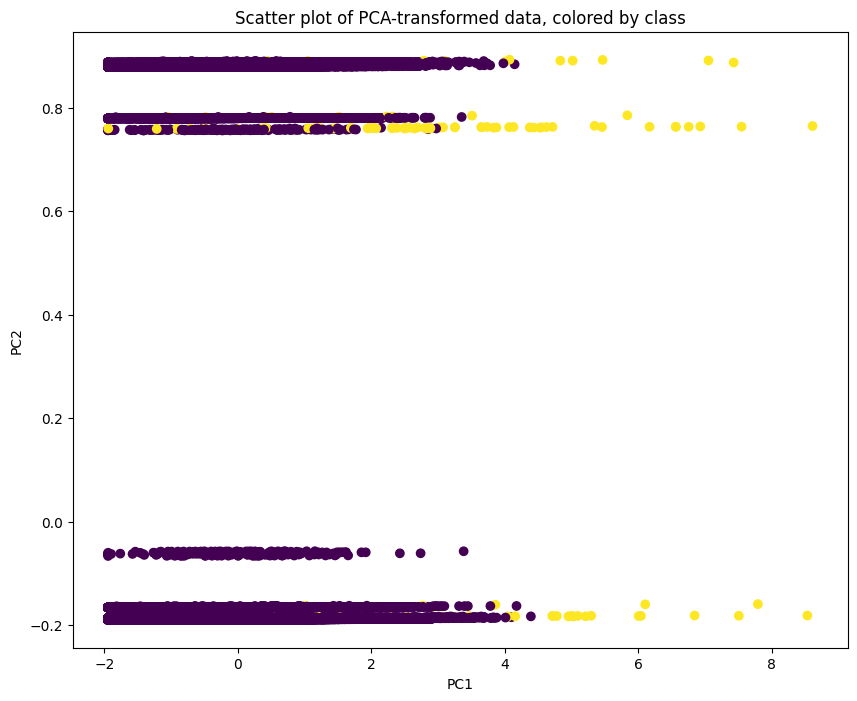

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()


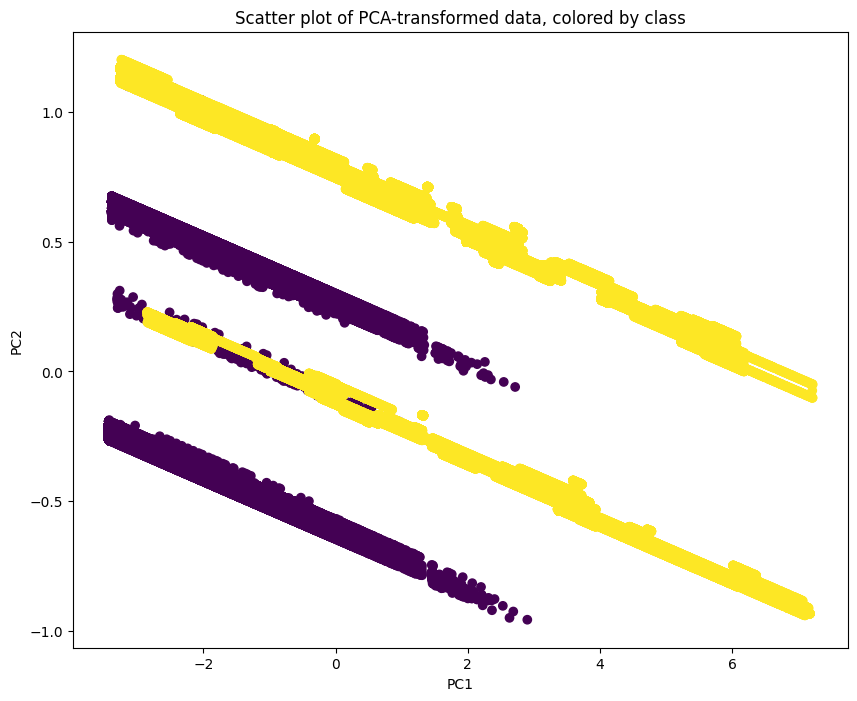

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_resampled)
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_resampled, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()


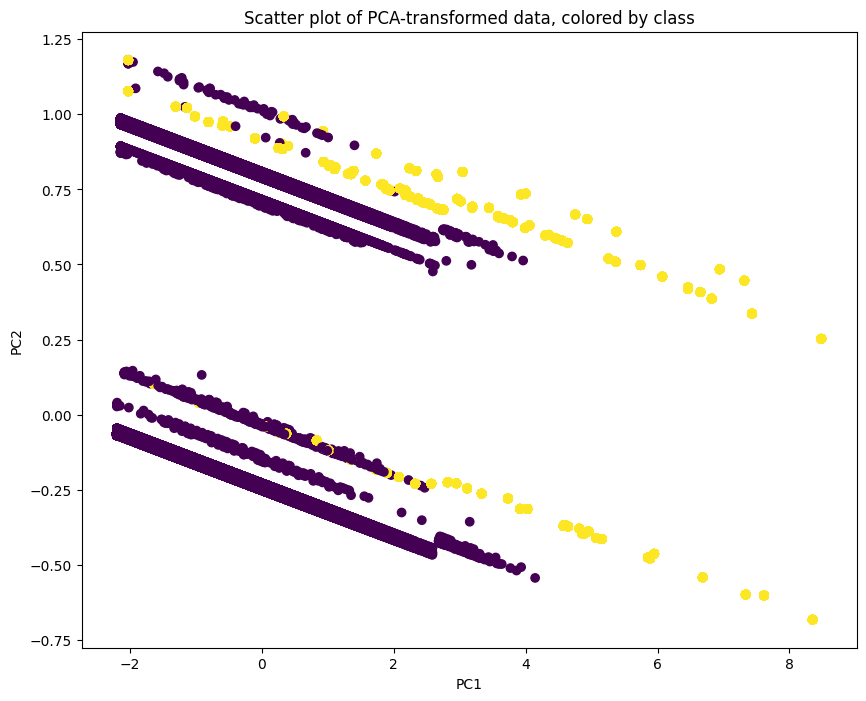

In [ ]:

import numpy as np

# Get the indices of the columns that contain True and False values
true_false_cols = X_train.columns[(X_train.dtypes == 'bool')]

# Convert True and False values to 1 and 0, respectively
X_train[true_false_cols] = np.where(X_train[true_false_cols], 1, 0)
X_train_vec = X_train.to_numpy()
X_train_bsmote = []
y_train_bsmote = []
y_train_vec = y_train.to_numpy()
count = 0
for i in range(len(X_train_vec)):
  if(y_train_vec[i] == True):
    for j in range(100):
      random_number = np.random.uniform(1.0, 1.0)
      test = X_train_vec[i][-1] * random_number
      test_vec = X_train_vec[i].copy()
      test_vec[-1] = test
      X_train_bsmote.append(test_vec)
      y_train_bsmote.append(True)

  else:
    X_train_bsmote.append(X_train_vec[i])
    y_train_bsmote.append(False)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_bsmote)
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_bsmote, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()




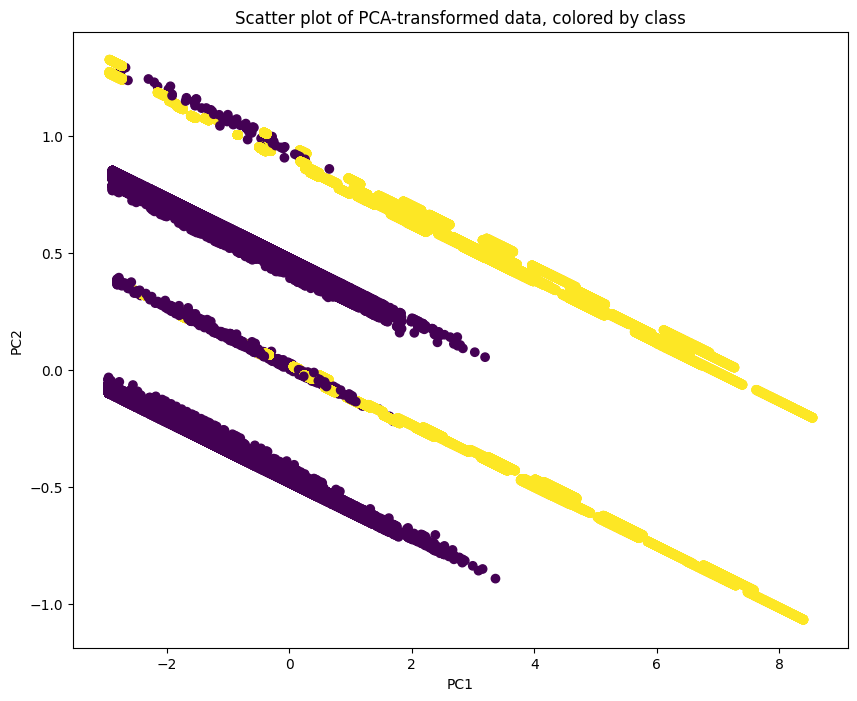

In [ ]:

import numpy as np

# Get the indices of the columns that contain True and False values
true_false_cols = X_train.columns[(X_train.dtypes == 'bool')]

# Convert True and False values to 1 and 0, respectively
X_train[true_false_cols] = np.where(X_train[true_false_cols], 1, 0)
X_train_vec = X_train.to_numpy()
X_train_bsmote = []
y_train_bsmote = []
y_train_vec = y_train.to_numpy()
count = 0
for i in range(len(X_train_vec)):
  if(y_train_vec[i] == True):
    for j in range(500):
      random_number = np.random.uniform(0.99, 1.1)
      test = X_train_vec[i][-1] * random_number
      test_vec = X_train_vec[i].copy()
      test_vec[-1] = test
      X_train_bsmote.append(test_vec)
      y_train_bsmote.append(True)

  else:
    X_train_bsmote.append(X_train_vec[i])
    y_train_bsmote.append(False)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_bsmote)
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_bsmote, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()




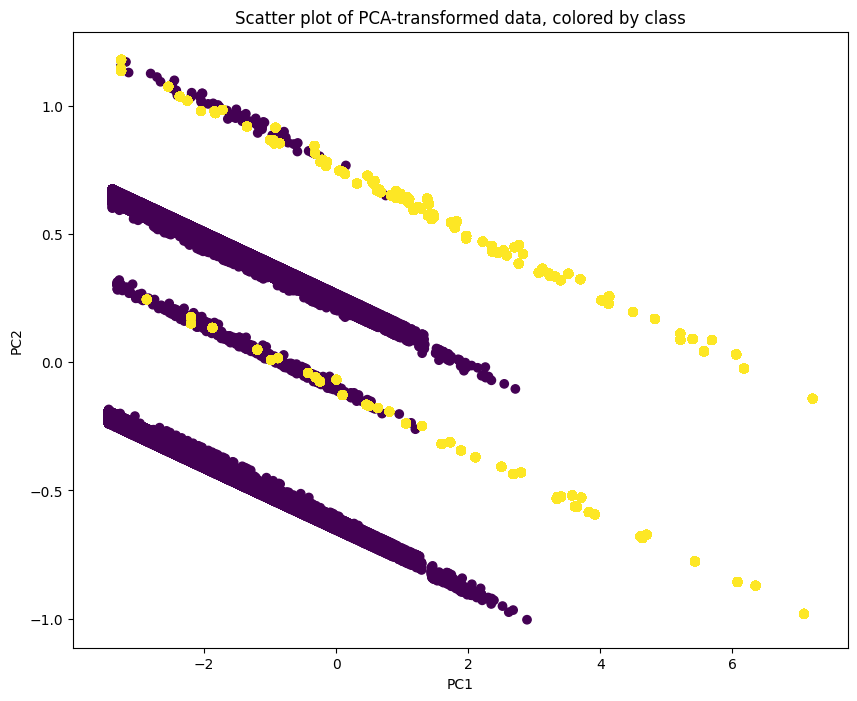

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_over)
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_over, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()




In [ ]:
print(y_train_bsmote.count(True))
print(y_train_bsmote.count(False))

65500
135286


In [ ]:
rf_bsmote = RandomForestClassifier(n_estimators=100, random_state=13)
# Fit the model on the entire training data
rf_bsmote.fit(X_train_bsmote, y_train_bsmote)

# Make predictions on the test data
y_pred_bsmote = rf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bsmote)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[57975     6]
 [   13    43]]


In [ ]:
# nn_pred = rf.predict(X_train)
# nn['BSMOTE'] = nn_pred
# nn.head()

In [ ]:
# prompt: make all values in X_train which are true to 1 and False to 0 for all columns whose value are in true and false

import numpy as np

# Get the indices of the columns that contain True and False values
true_false_cols = X_train.columns[(X_train.dtypes == 'bool')]

# Convert True and False values to 1 and 0, respectively
X_train[true_false_cols] = np.where(X_train[true_false_cols], 1, 0)

# Print the updated DataFrame
X_train.head()


,STATE_ATTACHED,IS_FRAUD,IS_FLAG,STATE_PLACEHOLDER_0,STATE_PLACEHOLDER_1,STATE_PLACEHOLDER_2,STATE_PLACEHOLDER_4,STATE_PLACEHOLDER_5,STATE_PLACEHOLDER_6,STATE_PLACEHOLDER_7,...,STATE_PLACEHOLDER_40,STATE_PLACEHOLDER_41,STATE_PLACEHOLDER_42,STATE_PLACEHOLDER_44,STATE_PLACEHOLDER_45,STATE_PLACEHOLDER_46,STATE_PLACEHOLDER_48,STATE_PLACEHOLDER_49,STATE_PLACEHOLDER_50,REFUND_SCALED
145355,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1.229509
36874,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.018206
100511,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-1.477000
125863,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.099972
154654,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.209178


In [ ]:
X_train_vec = X_train.to_numpy()
y_train.value_counts()

IS_SUSPICIOUS
False    135286
True        131
Name: count, dtype: int64

In [ ]:
X_train_bsmote = []
y_train_bsmote = []
y_train_vec = y_train.to_numpy()
count = 0
for i in range(len(X_train_vec)):
  if(y_train_vec[i] == True):
    for j in range(100):
      random_number = np.random.uniform(0.95, 1.1)
      test = X_train_vec[i][-1] * random_number
      test_vec = X_train_vec[i].copy()
      test_vec[-1] = test
      X_train_bsmote.append(test_vec)
      y_train_bsmote.append(True)

  else:
    X_train_bsmote.append(X_train_vec[i])
    y_train_bsmote.append(False)



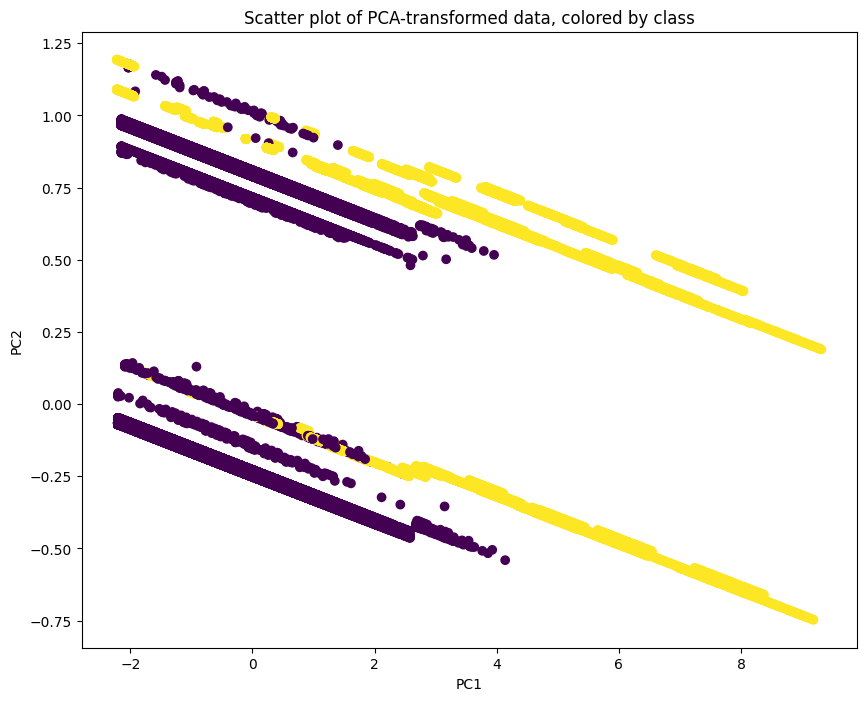

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_bsmote)
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_bsmote, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()


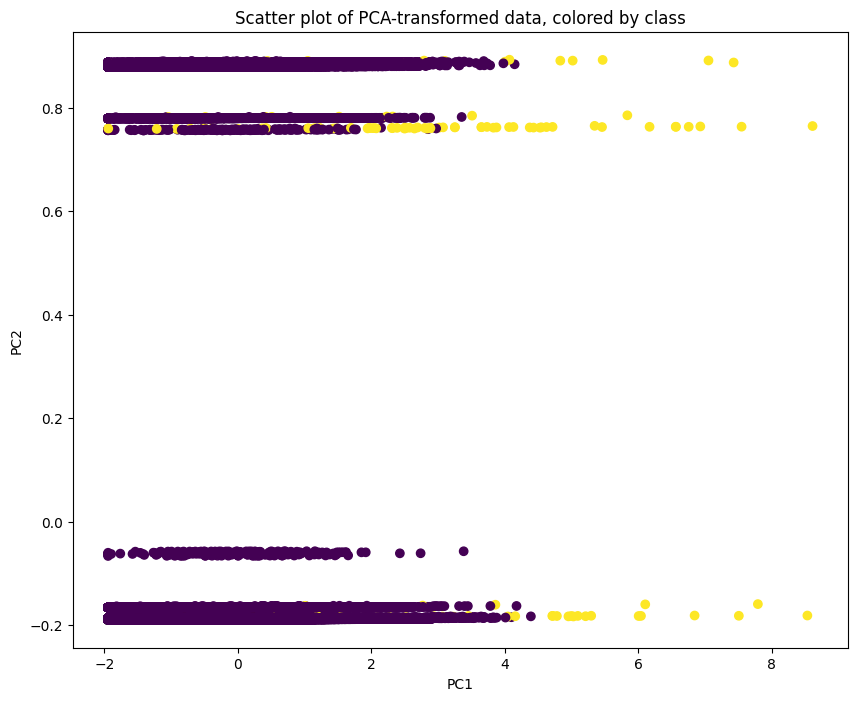

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()


In [ ]:
# X_train_smote[:1]


In [ ]:
# X_train[:1]

In [ ]:
# nn = pd.DataFrame()
# nn['Target'] = y_train
# nn.head()

In [ ]:
# nn.head()

In [ ]:
# nn.to_csv('nn.csv')

In [ ]:
# y_test

In [ ]:
majority_df = pd.DataFrame()
majority_df['BSMOTE'] = y_pred_bsmote
majority_df['SMOTE'] = y_pred_smote
majority_df['ROS'] = y_pred_ros
majority_df['Target'] = y_test.tolist()
majority_df = majority_df.replace({True: 1, False: 0})
majority_df.head()

,BSMOTE,SMOTE,ROS,Target
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
# prompt: generate a column in majority_df dataframe where the value is majority of BSMOTE, SMOTE, ROS

  # majority_df['Majority'] = np.where((majority_df['BSMOTE'] == majority_df['SMOTE']) & (majority_df['BSMOTE'] == majority_df['ROS']), majority_df['BSMOTE'], np.where((majority_df['BSMOTE'] == majority_df['ROS']), majority_df['BSMOTE'], majority_df['ROS']))
  # majority_df.head()
holder = []

for index, row in majority_df.iterrows():
  if row['BSMOTE'] + row['SMOTE'] + row['ROS'] > 1.5:
    holder.append(1)
    if row['BSMOTE'] + row['SMOTE'] + row['ROS'] < 2.5:
      print('------------')
      print('Disagreement')
      print('------------')
      print(f'BSMOTE: {row["BSMOTE"]}, SMOTE: {row["SMOTE"]}, ROS: {row["ROS"]}')
  else:
    holder.append(0)

majority_df['Majority'] = holder


In [ ]:
majority_df.head()

,BSMOTE,SMOTE,ROS,Target,Majority
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(majority_df['Target'],majority_df['Majority'])

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[57975     6]
 [   13    43]]


15

[57970    11]

[16    40]

------------

20

[57970    11]

[15    41]

------------

24

[57972     9]

[17    39]

------------

25

[57972     9]

[16    40]

------------

26

[57972     9]

[16    40]

------------

30

[57968    13]

[22    34]

------------

35

[57971    10]

[15    41]

------------

40

[57971    10]

[14    42]

------------

50

[57976     5]

[14    42]

------------

52

[57975     6]

[13    43]

------------

ALL

[57981     0]

[0    56]
